In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# set datetime index
resampled_data = pd.read_csv("Sprint_Resampled Data.csv")
resampled_data['Date'] = resampled_data['Date'].apply(pd.to_datetime)
resampled_data = resampled_data.set_index('Date')

In [4]:
# handling missing value
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.9*(len(test)))]
valid = test[int(0.9*(len(test))):]
resampled_data
model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\villy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\villy\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [31]:
test
# test.describe().transpose()
# test.iloc[:,[2:3]]

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",U.S. Field Production of Crude Oil (Thousand Barrels),Weekly U.S. Product Supplied of Petroleum Products (Thousand Barrels per Day),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel (Thousand Barrels per Day),Weekly U.S. Product Supplied of Distillate Fuel Oil (Thousand Barrels per Day),Weekly U.S. Product Supplied of Residual Fuel Oil (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),...,Weekly U.S. Imports of Residual Fuel Oil (Thousand Barrels per Day),Weekly U.S. Refiner Net Input of Crude Oil (Thousand Barrels per Day),Weekly U.S. Gross Inputs into Refineries (Thousand Barrels per Day),Weekly U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day),Weekly U.S. Percent Utilization of Refinery Operable Capacity (Percent),Weekly U.S. Refiner and Blender Adjusted Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Kerosene-Type Jet Fuel (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Distillate Fuel Oil (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Residual Fuel Oil (Thousand Barrels per Day)
Date,,,,,,,,,,,,,,,,,,,,,
1991-03-31,19.901500,233926.0,16956.40,7030.20,1350.20,3194.60,1180.60,1122.00,182.0,758.00,...,277.40,12867.40,12992.8,15656.00,83.000,6548.80,6548.80,1212.40,2907.00,1032.20
1991-04-30,20.830000,225256.0,16021.25,7105.00,1256.00,2823.75,1053.50,871.00,122.0,627.00,...,363.50,12972.25,13125.5,15657.50,83.750,6660.25,6660.25,1157.75,2790.50,913.00
1991-05-31,21.232273,229670.0,15982.75,7148.60,1181.60,2770.60,1045.20,892.00,127.0,638.00,...,366.20,13517.60,13668.2,15666.00,87.320,7021.60,7021.60,1207.20,2902.40,938.40
1991-06-30,20.189000,219610.0,16765.75,7533.50,1264.25,2868.75,1239.75,1062.00,156.0,750.00,...,454.50,13863.00,14017.0,15676.25,89.250,7262.00,7262.00,1276.00,2925.50,961.00
1991-07-31,21.403043,227756.0,16462.25,7542.25,1338.25,2693.00,1119.00,882.00,115.0,652.00,...,364.00,13685.75,13793.5,15692.50,88.000,7185.75,7185.75,1277.25,2973.00,925.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,51.375714,367546.0,20725.75,8933.00,1652.25,4048.50,311.00,7143.50,2252.5,4891.00,...,175.50,17075.25,17381.5,18603.50,93.425,9621.00,9576.00,1790.50,5299.50,401.00
2019-02-28,54.954737,326732.0,20785.50,8875.50,1677.25,4183.00,279.25,8014.25,3050.0,4964.25,...,176.75,16000.50,16259.0,18604.00,87.400,9629.25,9876.00,1730.50,4865.00,309.25
2019-03-31,58.151429,368642.0,20583.60,9173.20,1797.80,4235.20,183.60,7864.80,2870.0,4994.80,...,144.60,15977.60,16260.6,18604.00,87.400,9796.40,9934.00,1711.40,4898.60,328.00


Feature ranking:
1. Weekly U. S. Operable Crude Oil Distillation Capacity   (Thousand Barrels per Calendar Day) (0.814)
2. Weekly U.S. Exports of Crude Oil  (Thousand Barrels per Day) (0.043)
3. Weekly U.S. Exports of Crude Oil and Petroleum Products  (Thousand Barrels per Day) (0.037)
4. Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day) (0.014)
5. Weekly U.S. Refiner and Blender Net Production of Kerosene-Type Jet Fuel  (Thousand Barrels per Day) (0.012)
6. U.S. Field Production of Crude Oil (Thousand Barrels) (0.011)
7. Weekly U.S. Imports of Crude Oil and Petroleum Products  (Thousand Barrels per Day) (0.008)
8. Weekly U.S. Imports of Kerosene-Type Jet Fuel  (Thousand Barrels per Day) (0.007)
9. Weekly U.S. Imports of Distillate Fuel Oil  (Thousand Barrels per Day) (0.007)
10. Weekly U.S. Exports of Total Petroleum Products  (Thousand Barrels per Day) (0.005)
11. Weekly U.S. Imports of Total Petroleum Products  (Thousand Barrels per Day) (0.005)
12. Week

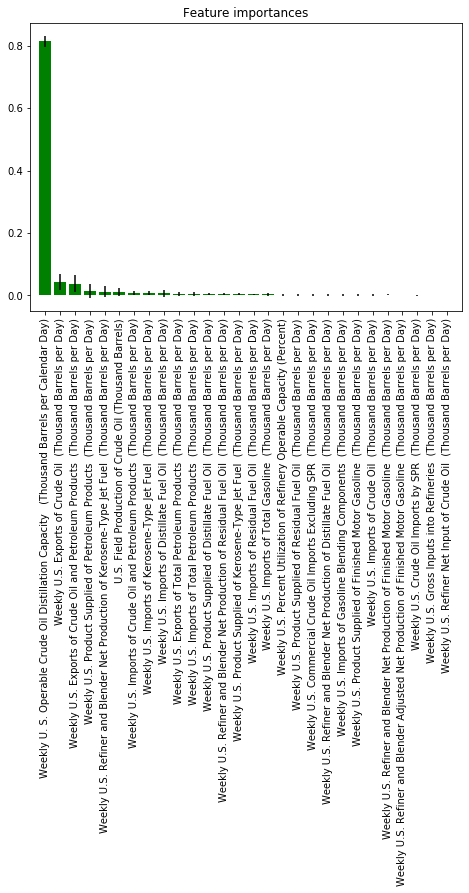

In [53]:
# Feature Ranking using Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import warnings                           # silence warnings that commonly occur with random forest
warnings.filterwarnings('ignore')     

x = test.iloc[:,1:]              # separate DataFrames for predictor and response features
y = test.iloc[:,0]

lab_enc = preprocessing.LabelEncoder(); y_encoded = lab_enc.fit_transform(y) # this removes an encoding error 

random_forest = RandomForestRegressor()   # instantiate the random forest  
random_forest = random_forest.fit(x,np.ravel(y_encoded)) # fit the random forest
importances = random_forest.feature_importances_ # extract the expected feature importances
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],axis=0) # calculate stdev over trees
indices = np.argsort(importances)[::-1]   # find indicies for descending order

print("Feature ranking:")                 # write out the feature importances
for f in range(x.shape[1]):
    print(str(f+1)+". "+str(x.columns.values[indices[f]])+" ("+str(round(importances[indices[f]],3))+")")
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.subplot(111)                          # plot the feature importance 
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=1., wspace=0.2, hspace=0.2)
plt.show()

In [48]:
# print(indices)
# # range(x.shape[1])
# x.columns[21]
# # x.columns[indices]
# y

[21  6  7  1  3 13  0  5 26 17 16 27 10  8 14  4 24 25 15  2 23 19  9 18
 22 11 12 20]


Date
1991-03-31    19.901500
1991-04-30    20.830000
1991-05-31    21.232273
1991-06-30    20.189000
1991-07-31    21.403043
                ...    
2019-01-31    51.375714
2019-02-28    54.954737
2019-03-31    58.151429
2019-04-30    63.862381
2019-05-31    60.826818
Name: Cushing, OK WTI Spot Price FOB (Dollars per Barrel), Length: 339, dtype: float64

In [63]:
# Recursive Feature Elimination using Random Forest Regression
from sklearn.feature_selection import RFE 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')            

rfe = RFE(RandomForestRegressor(max_depth=3), 1,verbose=0)      # set up RFE linear regression model
test['const'] = np.ones(len(test))            # let's add one's for the constant term

x = test.iloc[:,1:]
y = test.iloc[:,0]

lab_enc = preprocessing.LabelEncoder(); y_encoded = lab_enc.fit_transform(y)

rfe = rfe.fit(x,np.ravel(y_encoded))      # recursive elimination
dfS = test.drop('const',axis = 1)           # remove the ones
print(rfe.ranking_)                  # print the variable ranks

[ 5  3 26 25 20 16  4  2 14 13  9 18 11  6 10 17  7  8 19 21 22  1 23 15
 27 12 24 28 29]


In [67]:
for i in list(rfe.ranking_): 
    print(x.columns.values[i-1])

Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)
Weekly U.S. Refiner and Blender Net Production of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)
Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)
Weekly U.S. Refiner Net Input of Crude Oil  (Thousand Barrels per Day)
Weekly U.S. Imports of Gasoline Blending Components  (Thousand Barrels per Day)
Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)
Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)
Weekly U.S. Imports of Total Petroleum Products  (Thousand Barrels per Day)
Weekly U.S. Crude Oil Imports by SPR  (Thousand Barrels per Day)
Weekly U.S. Exports of Total Petroleum Products  (Thousand Barrels per Day)
Weekly U.S. Imports of Distillate Fuel Oil  (Thousand Barrels per Day)
Weekly U.S. Imports of Crude Oil